In [1]:
%matplotlib inline
import os

import matplotlib
import numpy as np
import pandas as pd
import xarray as xr

import climatools.html.html as climahtml
import climatools.scripts.g1_threshold as scripts

import IPython.display as display

import imp
imp.reload(scripts)

<module 'climatools.scripts.g1_threshold' from '/nuwa_cluster/home/jackyu/climatools/climatools/scripts/g1_threshold.py'>

In [2]:
analysis = scripts.Analysis()

In [3]:
crd = analysis.model('crd')
crd.type_model = 'crd'
crd.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                          'radiation/crd/LW/examples',
                          'separate_g_groups',
                          'study__lblnew_g1_threshold',
                          'o3',
                          'band05_wn_980_1100',
                          'P_50_T_250',
                          'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.175_.1_.1_.125',
                          'wgt_1_.85_.7_.6_.5_.4_.4',
                          'midlatitude_summer',
                          'rtotalband_265K')
crd.fpath_flux = 'output_fluxg.dat'
crd.fpath_coolr = 'output_coolrg.dat'
crd.linestyle = '-'
crd.load_data()

In [4]:
crdx_wgt = analysis.model('wgt')
crdx_wgt.type_model = 'crd'
crdx_wgt.rundir = os.path.join('/nuwa_cluster/home/jackyu',
                               'radiation/crd/LW/examples',
                               'separate_g_groups',
                               'study__lblnew_g1_threshold',
                               'o3',
                               'band05_wn_980_1100',
                               'P_50_T_250',
                               'min_1e-20_max_5e-18_ng_7_dlogN_.25_.25_.175_.1_.1_.125',
                               'wgt_1_.85_.7_.6_.5_.4_.4',
                               'midlatitude_summer',
                               'rtotalband_265K')
crdx_wgt.fpath_flux = 'output_xfluxg.dat'
crdx_wgt.fpath_coolr = 'output_xcoolrg.dat'
crdx_wgt.linestyle = '--'
crdx_wgt.load_data()

In [5]:
fig = analysis.fig_fluxcoolr('fig1')
fig.ggroups = [1, 2, 3, 4, 5, 6, 7]
fig.vars_plot['flux'] = ['flug', 'fnetg']
fig.vars_plot['cooling rate'] = ['coolrg']
fig.colors['flug'] = 'darkred'
fig.colors['fnetg'] = 'lightcoral'
fig.colors['coolrg'] = 'blue'
fig.varlims_from_indexrange['linear'] = (50, 1050)
fig.varlims_from_indexrange['log'] = (1e-4, 50)

In [6]:
table_fluxg = analysis.table('table_fluxg')
table_fluxg.sumg = False
table_fluxg.vartype = 'flux'
table_fluxg.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolrg = analysis.table('table_coolrg')
table_coolrg.vartype = 'cooling rate'
table_coolrg.sumg = False
table_coolrg.at_pressures = crd.data['cooling rate']\
                               .coords['pressure']\
                               .isel(pressure=[0, -1])


In [7]:
table_flux = analysis.table('table_flux')
table_flux.sumg = True
table_flux.vartype = 'flux'
table_flux.at_pressures = crd.data['flux']\
                             .coords['pressure']\
                             .isel(pressure=[0, -1])

table_coolr = analysis.table('table_coolr')
table_coolr.vartype = 'cooling rate'
table_coolr.sumg = True
table_coolr.at_pressures = crd.data['cooling rate']\
                              .coords['pressure']\
                              .isel(pressure=[0, -1])

In [8]:
table_dgdgs = analysis.table('dgdgs')
table_dgdgs.vartype = 'dgdgs'
table_dgdgs.sumg = False

In [9]:
fig.display_hrefanchor()

In [10]:
table_fluxg.display_hrefanchor()
table_coolrg.display_hrefanchor()
table_flux.display_hrefanchor()
table_coolr.display_hrefanchor()

In [11]:
table_dgdgs.display_hrefanchor()

In [12]:
for g in [1, 2, 3, 4, 5, 6, 7]:
    s = 'Table: cooling rate. g-group {}'.format(g)
    html = climahtml.getHTML_hrefanchor(s)
    display.display(display.HTML(html))

# Figure: flux, cooling rate. g-group 1

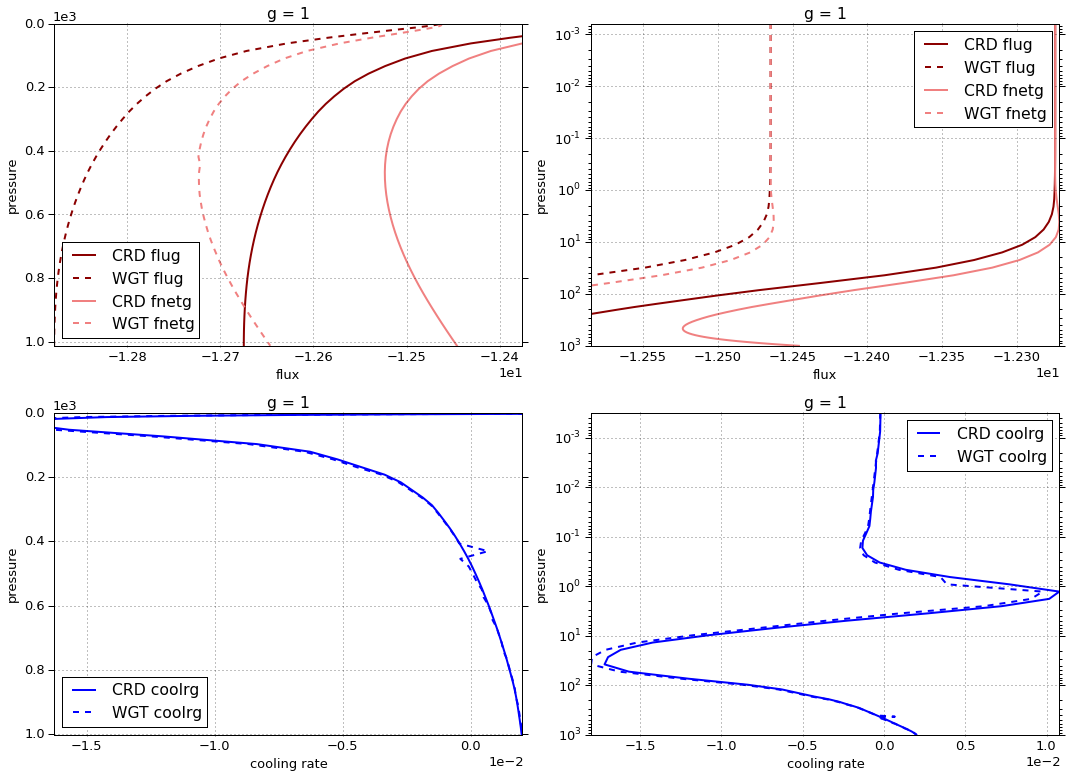

# Figure: flux, cooling rate. g-group 2

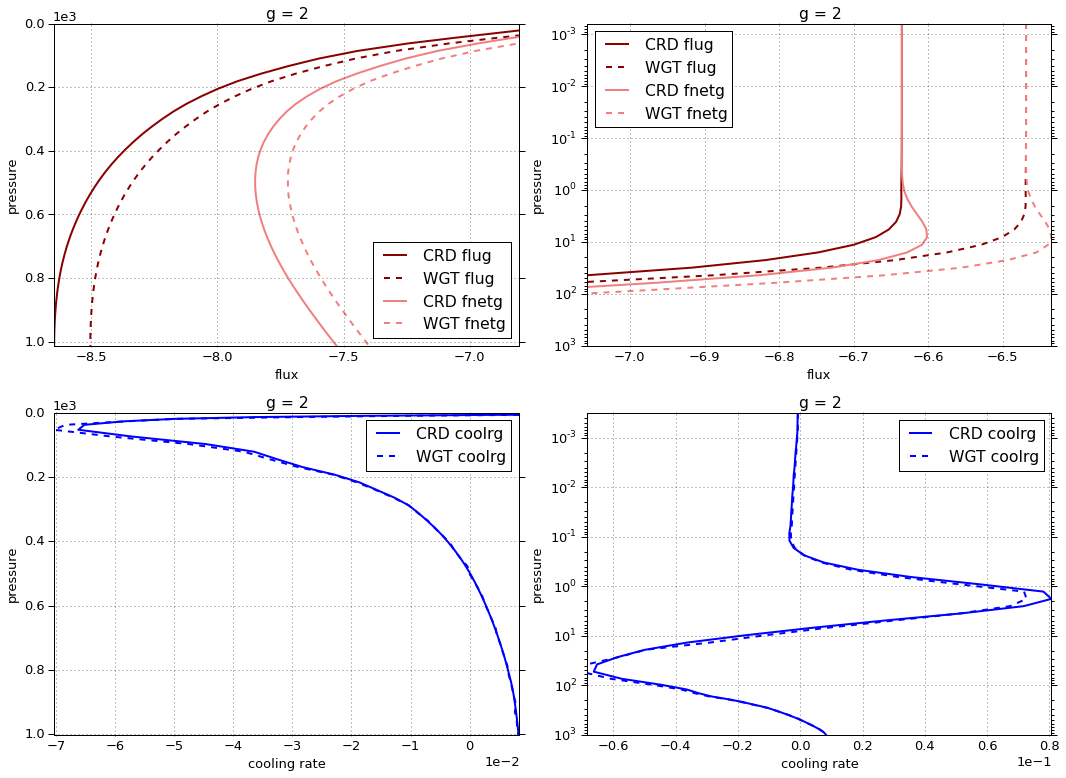

# Figure: flux, cooling rate. g-group 3

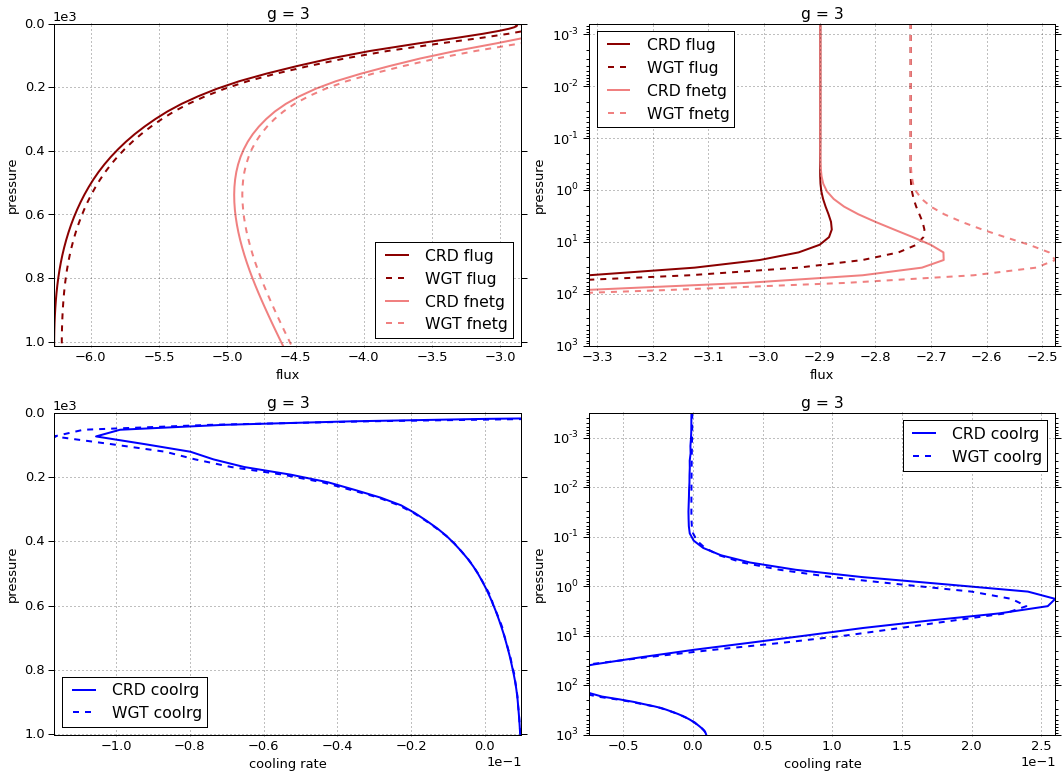

# Figure: flux, cooling rate. g-group 4

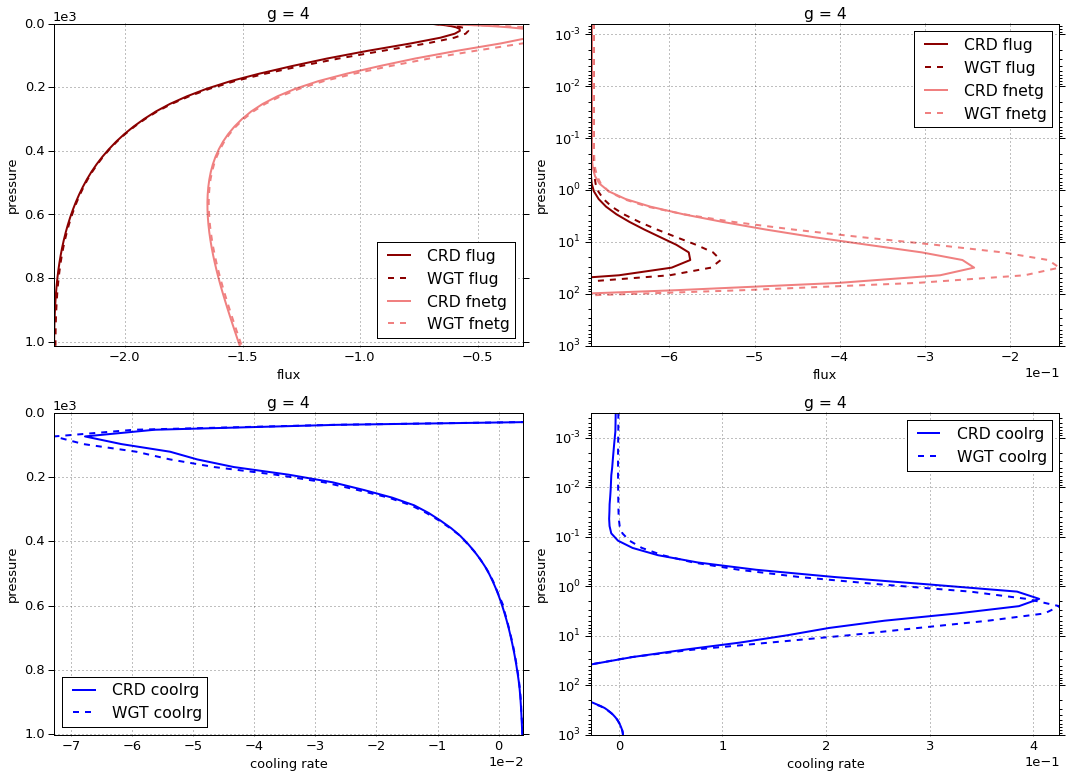

# Figure: flux, cooling rate. g-group 5

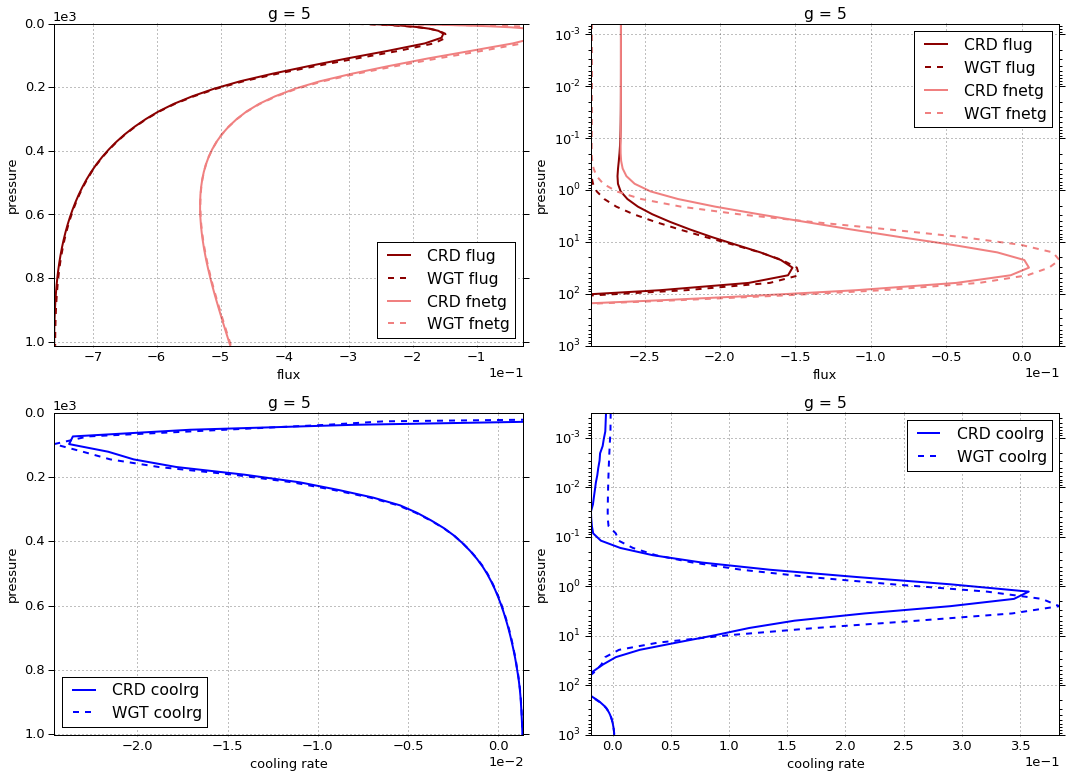

# Figure: flux, cooling rate. g-group 6

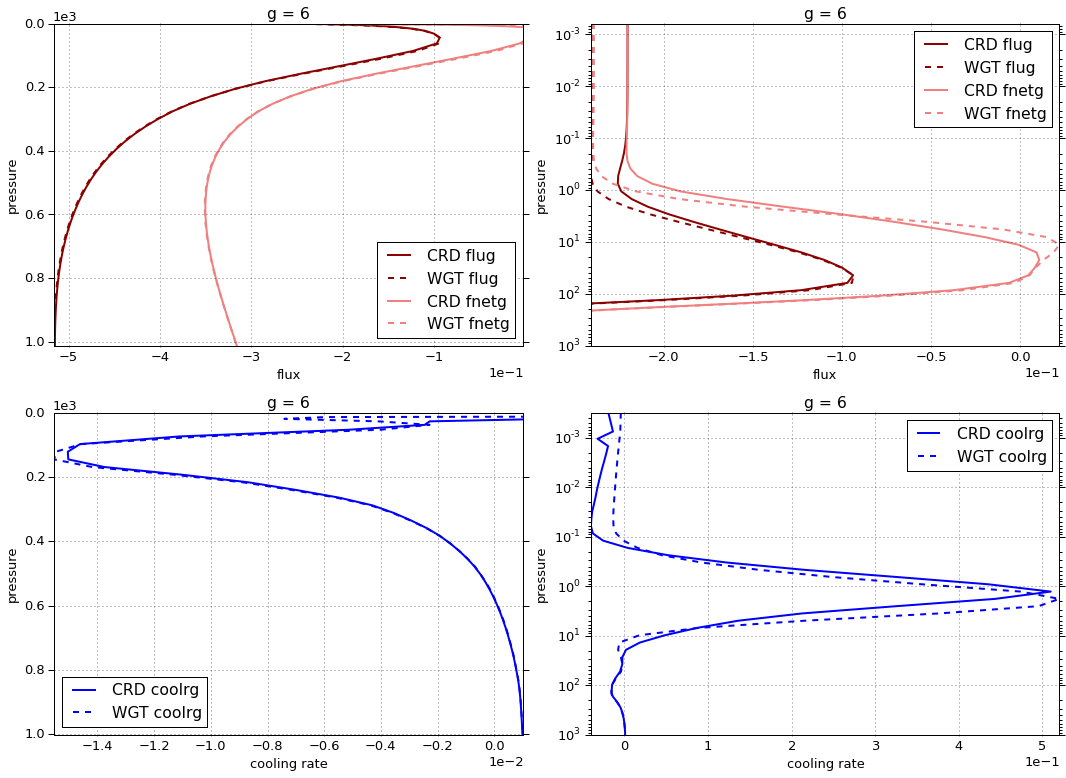

# Figure: flux, cooling rate. g-group 7

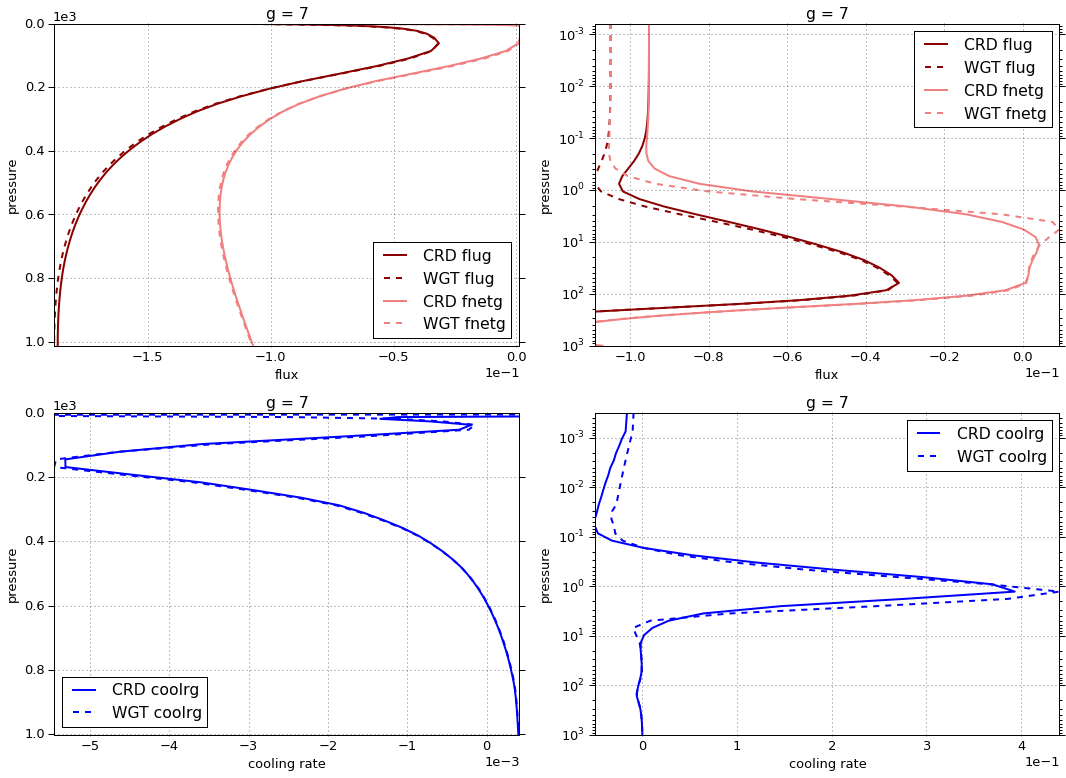

# Figure: flux, cooling rate. g-group total

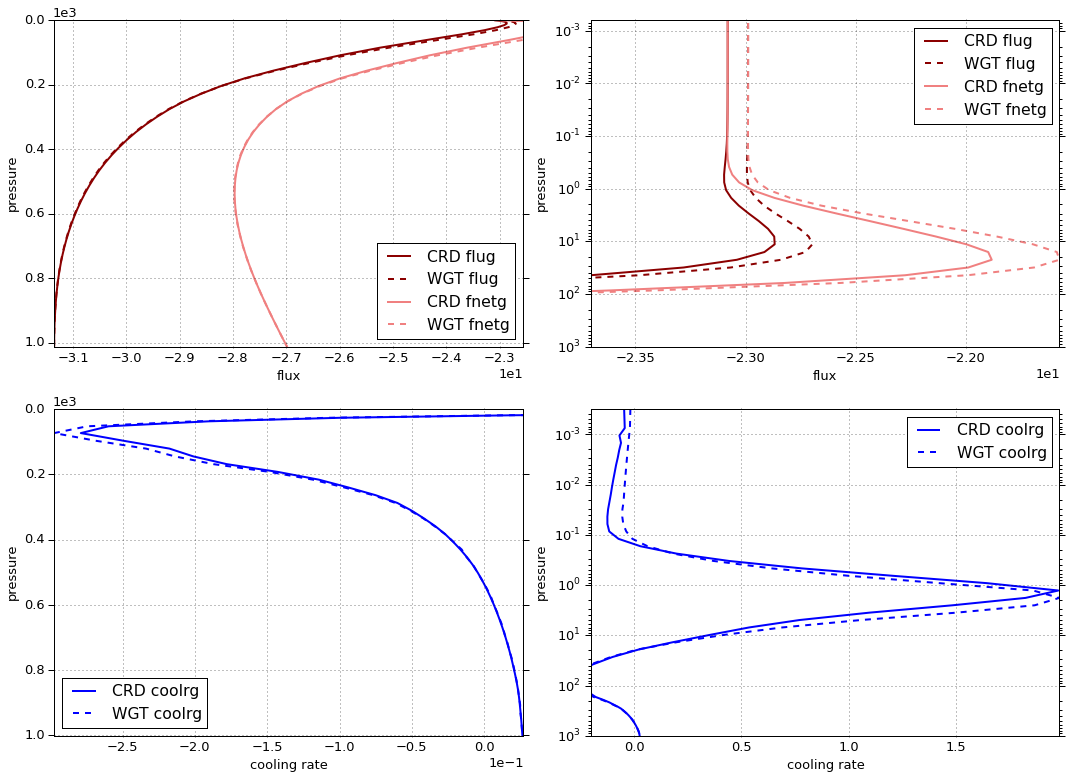

In [13]:
matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'black',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1}) 

fig.plot(analysis)


In [15]:
table_fluxg.display_withdiff(analysis, benchmark='crd')
table_coolrg.display_withdiff(analysis, benchmark='crd')
table_flux.display_withdiff(analysis, benchmark='crd')
table_coolr.display_withdiff(analysis, benchmark='crd')

# Table: flux. g-groups 


CRD


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.274527  0.000000 -12.274527
  1013     76    -12.674908  0.229195 -12.445712
2 0        1      -6.635504  0.000000  -6.635504
  1013     76     -8.646580  1.118645  -7.527935
3 0        1      -2.898934  0.000000  -2.898934
  1013     76     -6.269207  1.676264  -4.592942
4 0        1      -0.690935  0.000000  -0.690935
  1013     76     -2.301027  0.789364  -1.511663
5 0        1      -0.265646  0.000000  -0.265646
  1013     76     -0.760624  0.275518  -0.485106
6 0        1      -0.220544  0.000000  -0.220544
  1013     76     -0.515207  0.199278  -0.315929
7 0        1      -0.095270  0.000000  -0.095270
  1013     76     -0.186683  0.079533  -0.107150


WGT


flug      fldg      fnetg
g pressure level                                
1 0        1     -12.464636  0.000000 -12.464636
  1013     76    -12.878752  0.232341 -12.646411
2 0        1      -6.469069  0.000000  -6.469069
  1013     76     -8.503530  1.104229  -7.399301
3 0        1      -2.736736  0.000000  -2.736736
  1013     76     -6.213364  1.683937  -4.529427
4 0        1      -0.688458  0.000000  -0.688458
  1013     76     -2.295391  0.792000  -1.503391
5 0        1      -0.285167  0.000000  -0.285167
  1013     76     -0.759034  0.275111  -0.483923
6 0        1      -0.239761  0.000000  -0.239761
  1013     76     -0.516038  0.199968  -0.316070
7 0        1      -0.105067  0.000000  -0.105067
  1013     76     -0.188125  0.080611  -0.107514


WGT - CRD


flug      fldg     fnetg
g pressure level                              
1 0        1     -0.190109  0.000000 -0.190109
  1013     76    -0.203844  0.003146 -0.200699
2 0        1      0.166435  0.000000  0.166435
  1013     76     0.143050 -0.014416  0.128634
3 0        1      0.162198  0.000000  0.162198
  1013     76     0.055843  0.007673  0.063515
4 0        1      0.002477  0.000000  0.002477
  1013     76     0.005635  0.002636  0.008272
5 0        1     -0.019522  0.000000 -0.019522
  1013     76     0.001590 -0.000407  0.001183
6 0        1     -0.019217  0.000000 -0.019217
  1013     76    -0.000831  0.000689 -0.000142
7 0        1     -0.009797  0.000000 -0.009797
  1013     76    -0.001443  0.001078 -0.000365

# Table: cooling rate. g-groups 


CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000213
  1001.112500 75     0.001983
2 0.000312    1     -0.000803
  1001.112500 75     0.008280
3 0.000312    1     -0.001036
  1001.112500 75     0.009587
4 0.000312    1     -0.003103
  1001.112500 75     0.003873
5 0.000312    1     -0.005650
  1001.112500 75     0.001340
6 0.000312    1     -0.019095
  1001.112500 75     0.000985
7 0.000312    1     -0.015734
  1001.112500 75     0.000400


WGT


coolrg
g pressure    layer          
1 0.000312    1     -0.000228
  1001.112500 75     0.002008
2 0.000312    1     -0.000695
  1001.112500 75     0.008220
3 0.000312    1     -0.000454
  1001.112500 75     0.009665
4 0.000312    1     -0.000580
  1001.112500 75     0.003912
5 0.000312    1     -0.001665
  1001.112500 75     0.001343
6 0.000312    1     -0.004229
  1001.112500 75     0.000989
7 0.000312    1     -0.008782
  1001.112500 75     0.000404


WGT - CRD


coolrg
g pressure    layer          
1 0.000312    1     -0.000015
  1001.112500 75     0.000025
2 0.000312    1      0.000108
  1001.112500 75    -0.000060
3 0.000312    1      0.000582
  1001.112500 75     0.000078
4 0.000312    1      0.002523
  1001.112500 75     0.000039
5 0.000312    1      0.003984
  1001.112500 75     0.000004
6 0.000312    1      0.014866
  1001.112500 75     0.000004
7 0.000312    1      0.006952
  1001.112500 75     0.000004

# Table: flux. g-groups total


CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,-23.081360,0.000000,-23.081360
1013,76,-31.354235,4.367799,-26.986436



WGT


,,flug,fldg,fnetg
pressure,level,,,
0,1,-22.988894,0.000000,-22.988894
1013,76,-31.354235,4.368197,-26.986038



WGT - CRD


,,flug,fldg,fnetg
pressure,level,,,
0,1,9.246558e-02,0.000000,0.092466
1013,76,4.100000e-07,0.000398,0.000398


# Table: cooling rate. g-groups total


CRD


,,coolrg
pressure,layer,
0.000312,1,-0.045635
1001.112500,75,0.026448



WGT


,,coolrg
pressure,layer,
0.000312,1,-0.016634
1001.112500,75,0.026542



WGT - CRD


,,coolrg
pressure,layer,
0.000312,1,0.029001
1001.112500,75,0.000094


In [16]:
table_dgdgs.display_dgdgs(crd)

# Table: dgdgs. g-groups 

,dg,dgs
g,,
1,0.410750,0.402943
2,0.271208,0.276843
3,0.198167,0.200249
4,0.073208,0.073370
5,0.024208,0.024250
6,0.016458,0.016409
7,0.006000,0.005936


In [17]:
writer = pd.ExcelWriter('results.xlsx')

In [18]:
g = 1

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 1

crd                                 wgt                \
                  flug          fldg      fnetg       flug          fldg   
pressure                                                                   
0.000000    -12.274527  0.000000e+00 -12.274527 -12.464636  0.000000e+00   
0.000624    -12.274527  3.367796e-09 -12.274527 -12.464636  3.359798e-09   
0.000876    -12.274527  4.909586e-09 -12.274527 -12.464636  4.897549e-09   
0.001229    -12.274527  7.591089e-09 -12.274527 -12.464636  7.570572e-09   
0.001723    -12.274527  1.213470e-08 -12.274527 -12.464636  1.209725e-08   
0.002417    -12.274527  1.966105e-08 -12.274527 -12.464636  1.959135e-08   
0.003391    -12.274527  3.192088e-08 -12.274527 -12.464636  3.179181e-08   
0.004757    -12.274527  5.162484e-08 -12.274527 -12.464636  5.138945e-08   
0.006672    -12.274528  8.295111e-08 -12.274528 -12.464636  8.252947e-08   
0.009359    -12.274528  1.323180e-07 -12.274528 -12.464636  1.315760e-07   
0.013128    -12.274528  2.095427e-07 -12.274528 -12.464637  2.082577e-07   
0.018415    -12.274529  3.296169e-07 -12.274528 -12.464637  3.274234e-07   
0.025830    -12.274530  5.153210e-07 -12.274529 -12.464638  5.116247e-07   
0.036232    -12.274531  8.013245e-07 -12.274530 -12.464640  7.951656e-07   
0.050823    -12.274533  1.243887e-06 -12.274532 -12.464642  1.233691e-06   
0.071291    -12.274536  1.985078e-06 -12.274534 -12.464645  1.966964e-06   
0.100000    -12.274541  3.549031e-06 -12.274537 -12.464650  3.507596e-06   
0.140271    -12.274551  7.300089e-06 -12.274544 -12.464661  7.181823e-06   
0.196760    -12.274569  1.607600e-05 -12.274553 -12.464679  1.573418e-05   
0.275997    -12.274598  3.601538e-05 -12.274562 -12.464710  3.508089e-05   
0.387100    -12.274646  8.032617e-05 -12.274566 -12.464760  7.792210e-05   
0.543100    -12.274718  1.771443e-04 -12.274541 -12.464837  1.712809e-04   
0.761700    -12.274819  3.833877e-04 -12.274436 -12.464945  3.697957e-04   
1.068500    -12.274960  8.045655e-04 -12.274156 -12.465210  7.749433e-04   
1.498800    -12.275190  1.583847e-03 -12.273606 -12.465464  1.526122e-03   
2.102400    -12.275690  2.809960e-03 -12.272880 -12.466004  2.713318e-03   
2.949000    -12.276769  4.615724e-03 -12.272154 -12.467146  4.473835e-03   
4.136600    -12.278823  7.041668e-03 -12.271782 -12.469401  6.861675e-03   
5.802500    -12.282283  1.004879e-02 -12.272234 -12.473097  9.854983e-03   
8.139200    -12.287833  1.373570e-02 -12.274098 -12.478922  1.356373e-02   
...                ...           ...        ...        ...           ...   
323.525000  -12.608299  9.427058e-02 -12.514028 -12.811801  9.655936e-02   
347.300000  -12.614383  9.741363e-02 -12.516969 -12.817975  9.972525e-02   
371.075000  -12.619985  1.006972e-01 -12.519288 -12.823651  1.030383e-01   
394.850000  -12.625168  1.041251e-01 -12.521043 -12.828896  1.064933e-01   
418.625000  -12.630007  1.077285e-01 -12.522278 -12.833784  1.101174e-01   
442.400000  -12.634495  1.114698e-01 -12.523026 -12.838314  1.165226e-01   
466.175000  -12.638633  1.153207e-01 -12.523313 -12.842484  1.195290e-01   
489.950000  -12.642425  1.192463e-01 -12.523179 -12.846300  1.231107e-01   
513.725000  -12.645921  1.232654e-01 -12.522655 -12.849814  1.268450e-01   
537.500000  -12.649164  1.274068e-01 -12.521757 -12.853071  1.307439e-01   
561.275000  -12.652161  1.316584e-01 -12.520502 -12.856076  1.349473e-01   
585.050000  -12.654931  1.360160e-01 -12.518915 -12.858852  1.391069e-01   
608.825000  -12.657488  1.404950e-01 -12.516993 -12.861412  1.435596e-01   
632.600000  -12.659834  1.450759e-01 -12.514758 -12.863758  1.481180e-01   
656.375000  -12.661979  1.497579e-01 -12.512221 -12.865901  1.526472e-01   
680.150000  -12.663931  1.545445e-01 -12.509386 -12.867848  1.574263e-01   
703.925000  -12.665690  1.594209e-01 -12.506269 -12.869602  1.622969e-01   
727.700000  -12.667265  1.643830e-01 -12.502882 -12.871170  1.672567e-01   
751.475000  -12.668663  1.694279e-01 -12.499235 -12.872561  1.72201

In [19]:
g = 2

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 2

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -6.635504  0.000000e+00 -6.635504 -6.469069  0.000000e+00   
0.000624    -6.635504  1.908943e-08 -6.635504 -6.469069  1.672432e-08   
0.000876    -6.635504  2.782995e-08 -6.635504 -6.469069  2.439380e-08   
0.001229    -6.635504  4.303485e-08 -6.635504 -6.469069  3.773018e-08   
0.001723    -6.635504  6.880457e-08 -6.635504 -6.469070  6.032327e-08   
0.002417    -6.635505  1.115007e-07 -6.635504 -6.469070  9.774101e-08   
0.003391    -6.635505  1.810629e-07 -6.635505 -6.469070  1.586808e-07   
0.004757    -6.635505  2.928825e-07 -6.635505 -6.469070  2.566078e-07   
0.006672    -6.635506  4.706856e-07 -6.635505 -6.469071  4.122766e-07   
0.009359    -6.635507  7.509209e-07 -6.635506 -6.469072  6.575717e-07   
0.013128    -6.635508  1.189341e-06 -6.635507 -6.469073  1.041270e-06   
0.018415    -6.635511  1.871084e-06 -6.635509 -6.469075  1.637881e-06   
0.025830    -6.635514  2.925524e-06 -6.635511 -6.469078  2.560678e-06   
0.036232    -6.635519  4.549549e-06 -6.635515 -6.469082  3.982174e-06   
0.050823    -6.635527  7.062816e-06 -6.635520 -6.469089  6.182527e-06   
0.071291    -6.635539  1.127183e-05 -6.635527 -6.469099  9.864681e-06   
0.100000    -6.635559  2.013757e-05 -6.635539 -6.469117  1.759603e-05   
0.140271    -6.635597  4.128175e-05 -6.635556 -6.469150  3.595803e-05   
0.196760    -6.635660  9.028036e-05 -6.635570 -6.469204  7.837124e-05   
0.275997    -6.635758  2.001172e-04 -6.635558 -6.469288  1.732530e-04   
0.387100    -6.635899  4.399987e-04 -6.635459 -6.469405  3.803394e-04   
0.543100    -6.636068  9.531345e-04 -6.635115 -6.469545  8.237603e-04   
0.761700    -6.636211  2.019233e-03 -6.634192 -6.469653  1.747755e-03   
1.068500    -6.636241  4.145325e-03 -6.632096 -6.469648  3.601867e-03   
1.498800    -6.636163  8.045464e-03 -6.628118 -6.469429  7.045376e-03   
2.102400    -6.636553  1.419988e-02 -6.622353 -6.469785  1.259349e-02   
2.949000    -6.638435  2.327398e-02 -6.615161 -6.471447  2.100901e-02   
4.136600    -6.643341  3.543368e-02 -6.607907 -6.475875  3.266383e-02   
5.802500    -6.653111  5.042134e-02 -6.602690 -6.484890  4.752338e-02   
8.139200    -6.670489  6.870732e-02 -6.601782 -6.501243  6.613099e-02   
...               ...           ...       ...       ...           ...   
323.525000  -8.259515  4.809625e-01 -7.778553 -8.125866  4.759936e-01   
347.300000  -8.297377  4.984986e-01 -7.798879 -8.163398  4.935326e-01   
371.075000  -8.331877  5.166552e-01 -7.815222 -8.197466  5.110602e-01   
394.850000  -8.363460  5.354177e-01 -7.828043 -8.228584  5.293925e-01   
418.625000  -8.392635  5.548815e-01 -7.837754 -8.257362  5.489530e-01   
442.400000  -8.419431  5.748555e-01 -7.844576 -8.283550  5.682120e-01   
466.175000  -8.443896  5.951517e-01 -7.848744 -8.307553  5.880029e-01   
489.950000  -8.466107  6.155994e-01 -7.850507 -8.329188  6.086470e-01   
513.725000  -8.486400  6.362930e-01 -7.850107 -8.349061  6.285332e-01   
537.500000  -8.505069  6.573422e-01 -7.847726 -8.367186  6.488916e-01   
561.275000  -8.522178  6.786611e-01 -7.843517 -8.383800  6.698492e-01   
585.050000  -8.537867  7.003014e-01 -7.837566 -8.399012  6.912631e-01   
608.825000  -8.552240  7.222634e-01 -7.829977 -8.412955  7.125555e-01   
632.600000  -8.565331  7.444781e-01 -7.820853 -8.425591  7.343562e-01   
656.375000  -8.577211  7.669401e-01 -7.810271 -8.437071  7.564968e-01   
680.150000  -8.587942  7.896433e-01 -7.798299 -8.447388  7.791800e-01   
703.925000  -8.597551  8.125129e-01 -7.785039 -8.456657  8.014303e-01   
727.700000  -8.606094  8.355306e-01 -7.770563 -8.464859  8.241003e-01   
751.475000  -8.613628  8.587220e-01 -7.754906 -8.472094  8.468724e-01   
775.250000  -8.620193  8.820393e-01 -7.738153 -8.478385  8.699434e-01   
799.025000  -8.625828  9.054141e-01 -7.720414 -8.483766  8.933093e-01   
822

In [20]:
g = 3

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 3

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -2.898934  0.000000e+00 -2.898934 -2.736736  0.000000e+00   
0.000624    -2.898934  4.923515e-08 -2.898934 -2.736736  3.335747e-08   
0.000876    -2.898934  7.178690e-08 -2.898934 -2.736736  4.866887e-08   
0.001229    -2.898934  1.110519e-07 -2.898934 -2.736736  7.533754e-08   
0.001723    -2.898935  1.776556e-07 -2.898934 -2.736736  1.205950e-07   
0.002417    -2.898935  2.880967e-07 -2.898935 -2.736736  1.956788e-07   
0.003391    -2.898935  4.681734e-07 -2.898935 -2.736736  3.181777e-07   
0.004757    -2.898936  7.578631e-07 -2.898935 -2.736737  5.153783e-07   
0.006672    -2.898937  1.218835e-06 -2.898936 -2.736737  8.294299e-07   
0.009359    -2.898938  1.945892e-06 -2.898937 -2.736738  1.325234e-06   
0.013128    -2.898941  3.084143e-06 -2.898938 -2.736739  2.102323e-06   
0.018415    -2.898944  4.855330e-06 -2.898940 -2.736741  3.313161e-06   
0.025830    -2.898950  7.596621e-06 -2.898942 -2.736744  5.190262e-06   
0.036232    -2.898958  1.182148e-05 -2.898946 -2.736748  8.089003e-06   
0.050823    -2.898970  1.836359e-05 -2.898951 -2.736754  1.258886e-05   
0.071291    -2.898988  2.933556e-05 -2.898958 -2.736764  2.015950e-05   
0.100000    -2.899018  5.250578e-05 -2.898966 -2.736779  3.620846e-05   
0.140271    -2.899071  1.077642e-04 -2.898963 -2.736804  7.466843e-05   
0.196760    -2.899149  2.352540e-04 -2.898914 -2.736835  1.639519e-04   
0.275997    -2.899244  5.185458e-04 -2.898726 -2.736858  3.639255e-04   
0.387100    -2.899317  1.129091e-03 -2.898188 -2.736828  7.993910e-04   
0.543100    -2.899237  2.411500e-03 -2.896826 -2.736606  1.726856e-03   
0.761700    -2.898700  5.013901e-03 -2.893686 -2.735957  3.644245e-03   
1.068500    -2.897165  1.007018e-02 -2.887095 -2.734386  7.467538e-03   
1.498800    -2.894011  1.916643e-02 -2.874844 -2.731343  1.461592e-02   
2.102400    -2.889521  3.326339e-02 -2.856257 -2.726752  2.636593e-02   
2.949000    -2.884273  5.354466e-02 -2.830728 -2.721010  4.461528e-02   
4.136600    -2.879781  7.994473e-02 -2.799836 -2.715362  7.047596e-02   
5.802500    -2.878405  1.118294e-01 -2.766576 -2.712009  1.038105e-01   
8.139200    -2.883344  1.505597e-01 -2.732784 -2.713873  1.468802e-01   
...               ...           ...       ...       ...           ...   
323.525000  -5.606985  8.374123e-01 -4.769572 -5.559432  8.500169e-01   
347.300000  -5.678877  8.645298e-01 -4.814347 -5.631495  8.766955e-01   
371.075000  -5.743184  8.923195e-01 -4.850865 -5.695759  9.038538e-01   
394.850000  -5.801013  9.207911e-01 -4.880222 -5.753337  9.318299e-01   
418.625000  -5.853532  9.498903e-01 -4.903641 -5.805531  9.608164e-01   
442.400000  -5.900994  9.793366e-01 -4.921657 -5.852626  9.898305e-01   
466.175000  -5.943668  1.008887e+00 -4.934781 -5.894730  1.019007e+00   
489.950000  -5.981850  1.038250e+00 -4.943600 -5.932470  1.048050e+00   
513.725000  -6.016253  1.067559e+00 -4.948694 -5.966361  1.077020e+00   
537.500000  -6.047482  1.096979e+00 -4.950504 -5.997144  1.106072e+00   
561.275000  -6.075745  1.126448e+00 -4.949297 -6.024852  1.135357e+00   
585.050000  -6.101355  1.155959e+00 -4.945396 -6.049958  1.165203e+00   
608.825000  -6.124550  1.185544e+00 -4.939006 -6.072653  1.194148e+00   
632.600000  -6.145448  1.215148e+00 -4.930300 -6.093081  1.223378e+00   
656.375000  -6.164218  1.244740e+00 -4.919479 -6.111445  1.252953e+00   
680.150000  -6.181006  1.274331e+00 -4.906675 -6.127803  1.282687e+00   
703.925000  -6.195899  1.303911e+00 -4.891988 -6.142297  1.311918e+00   
727.700000  -6.209018  1.333347e+00 -4.875671 -6.155063  1.341177e+00   
751.475000  -6.220486  1.362735e+00 -4.857752 -6.166209  1.370422e+00   
775.250000  -6.230397  1.392035e+00 -4.838362 -6.175815  1.399692e+00   
799.025000  -6.238837  1.421148e+00 -4.817690 -6.183984  1.428713e+00   
822

In [21]:
g = 4

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 4

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.690935  0.000000e+00 -0.690935 -0.688458  0.000000e+00   
0.000624    -0.690936  1.331575e-07 -0.690935 -0.688459  7.901118e-08   
0.000876    -0.690936  1.940380e-07 -0.690936 -0.688459  1.152269e-07   
0.001229    -0.690936  2.996259e-07 -0.690936 -0.688459  1.780575e-07   
0.001723    -0.690937  4.779985e-07 -0.690936 -0.688459  2.842393e-07   
0.002417    -0.690937  7.725611e-07 -0.690936 -0.688459  4.596656e-07   
0.003391    -0.690938  1.250879e-06 -0.690937 -0.688459  7.446811e-07   
0.004757    -0.690940  2.017173e-06 -0.690938 -0.688460  1.201593e-06   
0.006672    -0.690943  3.231474e-06 -0.690940 -0.688461  1.926215e-06   
0.009359    -0.690947  5.138644e-06 -0.690942 -0.688462  3.065426e-06   
0.013128    -0.690954  8.111643e-06 -0.690946 -0.688464  4.843481e-06   
0.018415    -0.690964  1.271749e-05 -0.690951 -0.688468  7.602361e-06   
0.025830    -0.690979  1.981355e-05 -0.690959 -0.688472  1.186124e-05   
0.036232    -0.691001  3.069751e-05 -0.690970 -0.688479  1.841001e-05   
0.050823    -0.691034  4.746104e-05 -0.690987 -0.688490  2.852937e-05   
0.071291    -0.691084  7.518613e-05 -0.691009 -0.688505  4.533540e-05   
0.100000    -0.691166  1.317141e-04 -0.691034 -0.688528  7.978411e-05   
0.140271    -0.691298  2.600658e-04 -0.691038 -0.688558  1.585817e-04   
0.196760    -0.691491  5.413988e-04 -0.690950 -0.688584  3.331601e-04   
0.275997    -0.691729  1.133895e-03 -0.690596 -0.688563  7.066385e-04   
0.387100    -0.691932  2.340196e-03 -0.689592 -0.688395  1.484110e-03   
0.543100    -0.691868  4.726085e-03 -0.687142 -0.687838  3.068311e-03   
0.761700    -0.691006  9.264004e-03 -0.681742 -0.686453  6.204139e-03   
1.068500    -0.688436  1.752244e-02 -0.670913 -0.683349  1.224163e-02   
1.498800    -0.682892  3.157363e-02 -0.651319 -0.677240  2.342308e-02   
2.102400    -0.674223  5.192304e-02 -0.622300 -0.667562  4.189052e-02   
2.949000    -0.662051  7.848643e-02 -0.583565 -0.653485  7.046344e-02   
4.136600    -0.646779  1.091833e-01 -0.537596 -0.635347  1.101560e-01   
5.802500    -0.629421  1.424027e-01 -0.487018 -0.614524  1.596776e-01   
8.139200    -0.610709  1.798019e-01 -0.430907 -0.591887  2.169416e-01   
...               ...           ...       ...       ...           ...   
323.525000  -1.963172  4.288328e-01 -1.534339 -1.959405  4.312588e-01   
347.300000  -2.002739  4.415902e-01 -1.561149 -1.999387  4.438445e-01   
371.075000  -2.037570  4.545670e-01 -1.583003 -2.034458  4.566270e-01   
394.850000  -2.068428  4.677245e-01 -1.600704 -2.065437  4.699937e-01   
418.625000  -2.096072  4.810733e-01 -1.614999 -2.093104  4.831375e-01   
442.400000  -2.120743  4.944667e-01 -1.626276 -2.117688  4.964076e-01   
466.175000  -2.142668  5.077760e-01 -1.634892 -2.139517  5.096026e-01   
489.950000  -2.162073  5.208974e-01 -1.641176 -2.158825  5.226800e-01   
513.725000  -2.179384  5.338966e-01 -1.645487 -2.175969  5.356713e-01   
537.500000  -2.194951  5.468421e-01 -1.648110 -2.191371  5.486300e-01   
561.275000  -2.208919  5.597082e-01 -1.649211 -2.205174  5.614115e-01   
585.050000  -2.221474  5.725135e-01 -1.648961 -2.217522  5.742379e-01   
608.825000  -2.232762  5.852868e-01 -1.647475 -2.228643  5.873241e-01   
632.600000  -2.242860  5.979899e-01 -1.644870 -2.238556  6.000261e-01   
656.375000  -2.251871  6.106305e-01 -1.641241 -2.247402  6.126881e-01   
680.150000  -2.259881  6.232174e-01 -1.636664 -2.255256  6.252388e-01   
703.925000  -2.266947  6.357078e-01 -1.631239 -2.262196  6.377178e-01   
727.700000  -2.273138  6.481139e-01 -1.625024 -2.268237  6.501552e-01   
751.475000  -2.278523  6.604463e-01 -1.618076 -2.273486  6.624867e-01   
775.250000  -2.283154  6.726991e-01 -1.610455 -2.278001  6.747362e-01   
799.025000  -2.287079  6.848344e-01 -1.602245 -2.281829  6.869049e-01   
822

In [22]:
g = 5

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 5

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.265646  0.000000e+00 -0.265646 -0.285167  0.000000e+00   
0.000624    -0.265646  2.060437e-07 -0.265646 -0.285168  1.021211e-07   
0.000876    -0.265647  3.001631e-07 -0.265646 -0.285168  1.490458e-07   
0.001229    -0.265647  4.630901e-07 -0.265647 -0.285168  2.303247e-07   
0.001723    -0.265648  7.377732e-07 -0.265647 -0.285168  3.674501e-07   
0.002417    -0.265649  1.190459e-06 -0.265648 -0.285169  5.936205e-07   
0.003391    -0.265651  1.924024e-06 -0.265649 -0.285169  9.604788e-07   
0.004757    -0.265654  3.096767e-06 -0.265651 -0.285170  1.547656e-06   
0.006672    -0.265659  4.951125e-06 -0.265654 -0.285172  2.477431e-06   
0.009359    -0.265667  7.857010e-06 -0.265659 -0.285175  3.936998e-06   
0.013128    -0.265678  1.237611e-05 -0.265666 -0.285179  6.211821e-06   
0.018415    -0.265695  1.935931e-05 -0.265676 -0.285185  9.736751e-06   
0.025830    -0.265721  3.008768e-05 -0.265691 -0.285194  1.517130e-05   
0.036232    -0.265760  4.648988e-05 -0.265713 -0.285207  2.351801e-05   
0.050823    -0.265817  7.165423e-05 -0.265745 -0.285227  3.639986e-05   
0.071291    -0.265901  1.129103e-04 -0.265788 -0.285257  5.768229e-05   
0.100000    -0.266040  1.953171e-04 -0.265845 -0.285291  1.006301e-04   
0.140271    -0.266270  3.768941e-04 -0.265893 -0.285362  1.966582e-04   
0.196760    -0.266610  7.614005e-04 -0.265849 -0.285453  4.044363e-04   
0.275997    -0.267065  1.540674e-03 -0.265525 -0.285538  8.383019e-04   
0.387100    -0.267578  3.060478e-03 -0.264518 -0.285516  1.719119e-03   
0.543100    -0.267936  5.921221e-03 -0.262015 -0.285215  3.466957e-03   
0.761700    -0.267634  1.105900e-02 -0.256575 -0.284192  6.827814e-03   
1.068500    -0.265824  1.980486e-02 -0.246019 -0.281708  1.310079e-02   
1.498800    -0.261368  3.357365e-02 -0.227794 -0.276687  2.447174e-02   
2.102400    -0.254402  5.126800e-02 -0.203134 -0.268707  4.286148e-02   
2.949000    -0.244825  7.080436e-02 -0.174021 -0.257232  6.988034e-02   
4.136600    -0.233050  8.950927e-02 -0.143540 -0.242846  1.037905e-01   
5.802500    -0.219768  1.070326e-01 -0.112735 -0.226629  1.391582e-01   
8.139200    -0.205211  1.249695e-01 -0.080241 -0.209280  1.700606e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.634481  1.468368e-01 -0.487644 -0.633645  1.462030e-01   
347.300000  -0.649760  1.516810e-01 -0.498079 -0.649020  1.510443e-01   
371.075000  -0.663107  1.565622e-01 -0.506545 -0.662413  1.559189e-01   
394.850000  -0.674850  1.614635e-01 -0.513386 -0.674166  1.608121e-01   
418.625000  -0.685302  1.664001e-01 -0.518902 -0.684607  1.657389e-01   
442.400000  -0.694576  1.713210e-01 -0.523255 -0.693855  1.706789e-01   
466.175000  -0.702775  1.761820e-01 -0.526593 -0.701996  1.755322e-01   
489.950000  -0.709996  1.809485e-01 -0.529048 -0.709159  1.803116e-01   
513.725000  -0.716410  1.856464e-01 -0.530764 -0.715520  1.850252e-01   
537.500000  -0.722154  1.903093e-01 -0.531845 -0.721213  1.896951e-01   
561.275000  -0.727288  1.949239e-01 -0.532364 -0.726285  1.943128e-01   
585.050000  -0.731887  1.995038e-01 -0.532384 -0.730823  1.989037e-01   
608.825000  -0.736009  2.040561e-01 -0.531953 -0.734885  2.034616e-01   
632.600000  -0.739686  2.085703e-01 -0.531116 -0.738504  2.079825e-01   
656.375000  -0.742958  2.130513e-01 -0.529906 -0.741727  2.124716e-01   
680.150000  -0.745859  2.175002e-01 -0.528359 -0.744573  2.169338e-01   
703.925000  -0.748412  2.219076e-01 -0.526504 -0.747082  2.213708e-01   
727.700000  -0.750644  2.262759e-01 -0.524368 -0.749272  2.257482e-01   
751.475000  -0.752581  2.306111e-01 -0.521970 -0.751172  2.300767e-01   
775.250000  -0.754243  2.349082e-01 -0.519335 -0.752803  2.344038e-01   
799.025000  -0.755650  2.391579e-01 -0.516493 -0.754178  2.386422e-01   
822

In [23]:
g = 6

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 6

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.220544  0.000000e+00 -0.220544 -0.239761  0.000000e+00   
0.000624    -0.220545  4.406465e-07 -0.220545 -0.239761  1.764634e-07   
0.000876    -0.220546  6.418075e-07 -0.220545 -0.239761  2.590549e-07   
0.001229    -0.220548  9.895830e-07 -0.220547 -0.239762  4.021028e-07   
0.001723    -0.220549  1.575108e-06 -0.220548 -0.239762  6.433934e-07   
0.002417    -0.220552  2.538733e-06 -0.220550 -0.239763  1.041330e-06   
0.003391    -0.220557  4.098054e-06 -0.220552 -0.239765  1.686817e-06   
0.004757    -0.220563  6.587276e-06 -0.220557 -0.239767  2.720153e-06   
0.006672    -0.220574  1.051722e-05 -0.220563 -0.239771  4.357032e-06   
0.009359    -0.220590  1.666553e-05 -0.220573 -0.239777  6.928184e-06   
0.013128    -0.220614  2.620977e-05 -0.220588 -0.239786  1.093897e-05   
0.018415    -0.220650  4.092773e-05 -0.220609 -0.239800  1.716112e-05   
0.025830    -0.220704  6.348410e-05 -0.220641 -0.239820  2.676859e-05   
0.036232    -0.220786  9.786683e-05 -0.220688 -0.239851  4.155228e-05   
0.050823    -0.220907  1.504154e-04 -0.220756 -0.239897  6.441984e-05   
0.071291    -0.221089  2.359289e-04 -0.220853 -0.239966  1.022119e-04   
0.100000    -0.221385  4.040781e-04 -0.220981 -0.240075  1.780778e-04   
0.140271    -0.221869  7.665776e-04 -0.221102 -0.240248  3.462357e-04   
0.196760    -0.222590  1.515771e-03 -0.221074 -0.240502  7.068843e-04   
0.275997    -0.223574  2.992179e-03 -0.220582 -0.240826  1.453053e-03   
0.387100    -0.224751  5.775957e-03 -0.218975 -0.241113  2.952006e-03   
0.543100    -0.225825  1.081588e-02 -0.215009 -0.241085  5.886424e-03   
0.761700    -0.226007  1.945324e-02 -0.206554 -0.240185  1.144039e-02   
1.068500    -0.224041  3.332832e-02 -0.190712 -0.237402  2.162158e-02   
1.498800    -0.218252  5.353270e-02 -0.164719 -0.231193  3.960412e-02   
2.102400    -0.209242  7.623500e-02 -0.133007 -0.221467  6.707834e-02   
2.949000    -0.197309  9.695882e-02 -0.100350 -0.207998  1.033039e-01   
4.136600    -0.183372  1.129281e-01 -0.070444 -0.191840  1.400776e-01   
5.802500    -0.168554  1.249925e-01 -0.043561 -0.174701  1.655172e-01   
8.139200    -0.153395  1.337787e-01 -0.019617 -0.157561  1.727025e-01   
...               ...           ...       ...       ...           ...   
323.525000  -0.416108  1.014576e-01 -0.314650 -0.417225  1.019244e-01   
347.300000  -0.428237  1.053314e-01 -0.322905 -0.429432  1.058038e-01   
371.075000  -0.438813  1.092054e-01 -0.329607 -0.440059  1.096887e-01   
394.850000  -0.448101  1.130700e-01 -0.335031 -0.449370  1.135648e-01   
418.625000  -0.456354  1.169404e-01 -0.339413 -0.457630  1.174471e-01   
442.400000  -0.463663  1.207785e-01 -0.342884 -0.464938  1.212919e-01   
466.175000  -0.470114  1.245527e-01 -0.345561 -0.471378  1.250701e-01   
489.950000  -0.475787  1.282371e-01 -0.347550 -0.477027  1.287738e-01   
513.725000  -0.480816  1.318559e-01 -0.348960 -0.482037  1.323896e-01   
537.500000  -0.485314  1.354339e-01 -0.349880 -0.486504  1.359793e-01   
561.275000  -0.489328  1.389638e-01 -0.350365 -0.490489  1.395260e-01   
585.050000  -0.492919  1.424565e-01 -0.350463 -0.494048  1.430265e-01   
608.825000  -0.496133  1.459182e-01 -0.350215 -0.497237  1.464924e-01   
632.600000  -0.498996  1.493421e-01 -0.349654 -0.500068  1.499266e-01   
656.375000  -0.501540  1.527322e-01 -0.348808 -0.502583  1.533235e-01   
680.150000  -0.503794  1.560901e-01 -0.347704 -0.504809  1.566878e-01   
703.925000  -0.505774  1.594096e-01 -0.346365 -0.506761  1.600133e-01   
727.700000  -0.507504  1.626921e-01 -0.344812 -0.508468  1.632985e-01   
751.475000  -0.509004  1.659444e-01 -0.343059 -0.509943  1.665613e-01   
775.250000  -0.510289  1.691615e-01 -0.341128 -0.511208  1.697890e-01   
799.025000  -0.511376  1.723376e-01 -0.339038 -0.512281  1.729655e-01   
822

In [24]:
g = 7

s = 'Table: flux. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['flux']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'level'], axis=1))
             for name, model in analysis.models.items()]

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: flux. g-group 7

crd                               wgt                \
                 flug          fldg     fnetg      flug          fldg   
pressure                                                                
0.000000    -0.095270  0.000000e+00 -0.095270 -0.105067  0.000000e+00   
0.000624    -0.095271  6.013361e-07 -0.095271 -0.105068  2.958270e-07   
0.000876    -0.095272  8.756525e-07 -0.095271 -0.105068  4.314460e-07   
0.001229    -0.095274  1.349184e-06 -0.095272 -0.105069  6.662756e-07   
0.001723    -0.095276  2.145148e-06 -0.095274 -0.105070  1.062353e-06   
0.002417    -0.095279  3.452942e-06 -0.095276 -0.105072  1.715580e-06   
0.003391    -0.095285  5.565568e-06 -0.095279 -0.105075  2.775257e-06   
0.004757    -0.095294  8.931988e-06 -0.095285 -0.105080  4.471835e-06   
0.006672    -0.095307  1.423655e-05 -0.095293 -0.105087  7.159628e-06   
0.009359    -0.095327  2.251761e-05 -0.095305 -0.105098  1.138182e-05   
0.013128    -0.095358  3.534106e-05 -0.095323 -0.105116  1.796797e-05   
0.018415    -0.095405  5.505822e-05 -0.095350 -0.105142  2.818356e-05   
0.025830    -0.095475  8.516732e-05 -0.095390 -0.105181  4.394993e-05   
0.036232    -0.095579  1.308501e-04 -0.095448 -0.105244  6.818873e-05   
0.050823    -0.095734  2.002391e-04 -0.095534 -0.105337  1.056203e-04   
0.071291    -0.095966  3.118138e-04 -0.095654 -0.105470  1.671968e-04   
0.100000    -0.096339  5.273827e-04 -0.095812 -0.105688  2.893926e-04   
0.140271    -0.096942  9.794762e-04 -0.095962 -0.106051  5.553103e-04   
0.196760    -0.097832  1.884175e-03 -0.095948 -0.106593  1.111732e-03   
0.275997    -0.099050  3.598986e-03 -0.095451 -0.107336  2.228566e-03   
0.387100    -0.100556  6.689322e-03 -0.093866 -0.108203  4.373412e-03   
0.543100    -0.102083  1.198361e-02 -0.090099 -0.108993  8.370187e-03   
0.761700    -0.102912  2.046843e-02 -0.082443 -0.109085  1.542156e-02   
1.068500    -0.101936  3.293365e-02 -0.069002 -0.107508  2.718587e-02   
1.498800    -0.097748  4.878987e-02 -0.048958 -0.103000  4.511859e-02   
2.102400    -0.091315  6.214216e-02 -0.029173 -0.096121  6.584052e-02   
2.949000    -0.083387  6.892086e-02 -0.014466 -0.087438  8.194193e-02   
4.136600    -0.074950  6.960061e-02 -0.005349 -0.078090  8.564557e-02   
5.802500    -0.066800  6.702851e-02  0.000228 -0.069100  7.839246e-02   
8.139200    -0.059261  6.252068e-02  0.003260 -0.060952  6.765630e-02   
...               ...           ...       ...       ...           ...   
323.525000  -0.142976  3.838189e-02 -0.104594 -0.144174  3.903733e-02   
347.300000  -0.148309  4.010133e-02 -0.108208 -0.149589  4.077995e-02   
371.075000  -0.152970  4.180652e-02 -0.111164 -0.154309  4.250586e-02   
394.850000  -0.157069  4.349587e-02 -0.113573 -0.158454  4.421584e-02   
418.625000  -0.160713  4.517685e-02 -0.115536 -0.162136  4.591615e-02   
442.400000  -0.163943  4.683413e-02 -0.117109 -0.165391  4.759495e-02   
466.175000  -0.166794  4.845573e-02 -0.118338 -0.168260  4.923442e-02   
489.950000  -0.169301  5.003188e-02 -0.119269 -0.170781  5.083028e-02   
513.725000  -0.171523  5.157305e-02 -0.119950 -0.173012  5.238624e-02   
537.500000  -0.173510  5.309167e-02 -0.120418 -0.175001  5.391769e-02   
561.275000  -0.175282  5.458455e-02 -0.120698 -0.176778  5.543286e-02   
585.050000  -0.176868  5.605669e-02 -0.120811 -0.178363  5.692008e-02   
608.825000  -0.178286  5.751165e-02 -0.120774 -0.179781  5.839003e-02   
632.600000  -0.179548  5.894776e-02 -0.120601 -0.181039  5.983807e-02   
656.375000  -0.180670  6.036460e-02 -0.120306 -0.182156  6.126803e-02   
680.150000  -0.181663  6.176541e-02 -0.119898 -0.183146  6.268382e-02   
703.925000  -0.182536  6.314768e-02 -0.119388 -0.184016  6.407896e-02   
727.700000  -0.183297  6.451156e-02 -0.118786 -0.184772  6.545658e-02   
751.475000  -0.183957  6.585978e-02 -0.118097 -0.185427  6.681799e-02   
775.250000  -0.184523  6.719121e-02 -0.117332 -0.185988  6.816000e-02   
799.025000  -0.185001  6.850347e-02 -0.116497 -0.186462  6.948349e-02   
822

In [25]:
g = 1

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 1

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000213,-0.000228,-1.500690e-05
0.000750,-0.000236,-0.000255,-1.897130e-05
0.001052,-0.000287,-0.000311,-2.309609e-05
0.001476,-0.000338,-0.000366,-2.726056e-05
0.002070,-0.000389,-0.000421,-3.145561e-05
0.002904,-0.000500,-0.000476,2.405065e-05
0.004074,-0.000491,-0.000531,-3.996238e-05
0.005714,-0.000541,-0.000586,-4.426795e-05


In [26]:
g = 2

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 2

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.000803,-0.000695,0.000108
0.000750,-0.000897,-0.000778,0.000119
0.001052,-0.001087,-0.000943,0.000145
0.001476,-0.001274,-0.001105,0.000170
0.002070,-0.001506,-0.001265,0.000241
0.002904,-0.001673,-0.001424,0.000249
0.004074,-0.001825,-0.001580,0.000244
0.005714,-0.002095,-0.001735,0.000360


In [27]:
g = 3

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 3

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.001036,-0.000454,0.000582
0.000750,-0.001151,-0.000502,0.000649
0.001052,-0.001385,-0.000598,0.000787
0.001476,-0.001768,-0.000683,0.001085
0.002070,-0.001635,-0.000761,0.000874
0.002904,-0.002276,-0.000831,0.001445
0.004074,-0.002216,-0.000894,0.001322
0.005714,-0.002415,-0.000948,0.001467


In [28]:
g = 4

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 4

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.003103,-0.000580,0.002523
0.000750,-0.003443,-0.000628,0.002815
0.001052,-0.004131,-0.000726,0.003406
0.001476,-0.004779,-0.000795,0.003984
0.002070,-0.005396,-0.000843,0.004553
0.002904,-0.005986,-0.000872,0.005115
0.004074,-0.006546,-0.000878,0.005667
0.005714,-0.007366,-0.000862,0.006504


In [29]:
g = 5

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 5

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.005650,-0.001665,3.984402e-03
0.000750,-0.006274,-0.001847,4.427088e-03
0.001052,-0.007535,-0.002198,5.336954e-03
0.001476,-0.008547,-0.002515,6.032516e-03
0.002070,-0.010750,-0.002806,7.944247e-03
0.002904,-0.011196,-0.003074,8.122206e-03
0.004074,-0.012307,-0.003316,8.990476e-03
0.005714,-0.013140,-0.003533,9.606891e-03


In [30]:
g = 6

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 6

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.019095,-0.004229,0.014866
0.000750,-0.013579,-0.004805,0.008775
0.001052,-0.031900,-0.005763,0.026137
0.001476,-0.019435,-0.006662,0.012773
0.002070,-0.021584,-0.007521,0.014064
0.002904,-0.023907,-0.008343,0.015564
0.004074,-0.026401,-0.009126,0.017275
0.005714,-0.028577,-0.009870,0.018707


In [31]:
g = 7

s = 'Table: cooling rate. g-group {}'.format(g)
html = climahtml.getHTML_idanchor(s)
markdown = climahtml.getMarkdown_sectitle(s)
display.display(display.HTML(html))
display.display(display.Markdown(markdown))

keys_dfs = [(name, 
             model.data['cooling rate']\
             .sel(g=g)\
             .to_dataframe()\
             .drop(['g', 'layer'], axis=1))
             for name, model in analysis.models.items()]

keys_dfs.append(('{} - {}'.format(keys_dfs[1][0], keys_dfs[0][0]),
                 keys_dfs[1][1] - keys_dfs[0][1]))

keys, dfs = zip(*keys_dfs)

df = pd.concat(dfs, keys=keys, axis=1)

df.to_excel(writer, s.split(':')[1])
display.display(df)

# Table: cooling rate. g-group 7

,crd,wgt,wgt - crd
,coolrg,coolrg,coolrg
pressure,,,
0.000312,-0.015734,-0.008782,6.952430e-03
0.000750,-0.017203,-0.009796,7.407362e-03
0.001052,-0.021100,-0.011782,9.318021e-03
0.001476,-0.024051,-0.013679,1.037213e-02
0.002070,-0.027389,-0.015515,1.187426e-02
0.002904,-0.029675,-0.017298,1.237674e-02
0.004074,-0.033342,-0.019025,1.431644e-02
0.005714,-0.035473,-0.020697,1.477627e-02


In [32]:
writer.save()

In [135]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug.dat'),
                 sep=r'\s+')

df = df.set_index(['pressure'])

ds = xr.Dataset.from_dataframe(df)
ds.coords['level'] = ('pressure', ds['level'])

In [146]:
writer = pd.ExcelWriter('debug.xlsx')
ds.to_dataframe().to_excel(writer, 'debug')
writer.save()

In [192]:
# look at some debug info
dir_run = os.path.join('/nuwa_cluster/home/jackyu',
                       'radiation/crd/LW/examples',
                       'separate_g_groups',
                       'study__lblnew_g1_threshold',
                       'o3',
                       'band05_wn_980_1100',
                       'P_50_T_250',
                       'min_1e-20_max_5e-18_ng_5',
                       'wgt_1_.85_.7_.6_.45',
                       'midlatitude_summer')

df = pd.read_csv(os.path.join(dir_run, 'debug_irf.dat'),
                 sep=r'\s+')

layer = np.arange(1, 76 + 1)
g = np.arange(1, 5 + 1)
df.index = pd.MultiIndex.from_product([g, layer])
df = df.drop('g', axis=1)
df.index.names = ['g', 'layer']

ds = xr.Dataset.from_dataframe(df)

writer = pd.ExcelWriter('debug_irf.xlsx')
for g in [1, 2, 3, 4, 5]:
    ds.sel(g=g).to_dataframe()\
    .drop('g', axis=1)\
    .to_excel(writer, 'g = {}'.format(g))
    
writer.close()

In [33]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [158]:
!ls

debug.xlsx  debug_irf.xlsx  results.ipynb  results.xlsx


In [159]:
!pwd

/nuwa_cluster/home/jackyu/radiation/offline_radiation_notebooks/longwave/lblnew_20160916/study__g1_threshold/o3/band05_wn_980_1100/P_50_T_250/min_1e-20_max_5e-18_ng_5/wgt_1_.85_.7_.6_.45/midlatitude_summer
